# Benchmark experiments

### Benchmarking the assembly of a Laplace single layer operator

In our first experiment we benchmark the assembly of a Laplace single layer boundary operator.

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
import bempp.api
import numpy as np

In [17]:
from bempp.core.opencl_kernels import default_device, set_default_cpu_device_by_name, set_default_gpu_device_by_name, default_cpu_device, default_gpu_device

def run_single_layer_benchmark():
    """Benchmark the single layer operator."""
    grid_sizes = [3, 4, 5, 6]
    nelements = []
    results = {}
    results[("P0", "single")] = []
    results[("P0", "double")] = []
    results[("P1", "single")] = []
    results[("P1", "double")] = []
    results["nelements"] = []
    
    print(f"Default Device: {default_device().name}")


    for grid_size in grid_sizes:
        grid = bempp.api.shapes.regular_sphere(grid_size)
        p0_space = bempp.api.function_space(grid, "DP", 0)
        p1_space = bempp.api.function_space(grid, "P", 1)
        print(f"Run tests for grid size parameter {grid_size}")
        result_p0_single = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.laplace.single_layer(p0_space, p0_space, p0_space, precision="single").weak_form()
        result_p1_single = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.laplace.single_layer(p1_space, p1_space, p1_space, precision="single").weak_form()
        result_p0_double = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.laplace.single_layer(p0_space, p0_space, p0_space, precision="double").weak_form()
        result_p1_double = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.laplace.single_layer(p1_space, p1_space, p1_space, precision="double").weak_form()
        results[("P0", "single")].append(result_p0_single.best)
        results[("P0", "double")].append(result_p0_double.best)
        results[("P1", "single")].append(result_p1_single.best)
        results[("P1", "double")].append(result_p1_double.best)
        results["nelements"].append(grid.number_of_elements)
        
    return results

# Tests for single layer assembly

In [18]:
bempp.api.BOUNDARY_OPERATOR_DEVICE_TYPE = 'cpu'

bempp.core.opencl_kernels.set_default_cpu_device_by_name('Portable Computing Language')
results_pocl = run_single_layer_benchmark()

bempp.core.opencl_kernels.set_default_cpu_device_by_name('Intel(R) OpenCL')
results_intel = run_single_layer_benchmark()

Default Device: pthread-Intel(R) Core(TM) i9-9980HK CPU @ 2.40GHz
Run tests for grid size parameter 3
31.7 ms ± 4.03 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
54.5 ms ± 3.67 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
33 ms ± 1.07 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
54.8 ms ± 1.11 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
Run tests for grid size parameter 4
55.3 ms ± 5 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
122 ms ± 12.7 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
80 ms ± 1.56 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
142 ms ± 449 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
Run tests for grid size parameter 5
358 ms ± 21.3 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
820 ms ± 43.5 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
663 ms ± 2.41 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
1.38 s ± 5.54 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


/home/betcke/miniconda3/envs/dev/lib/python3.9/site-packages/pyopencl/__init__.py:266: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


52.7 ms ± 4.37 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
74.8 ms ± 2.09 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
48.9 ms ± 200 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
69.9 ms ± 933 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
Run tests for grid size parameter 4
80.6 ms ± 4.1 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
131 ms ± 11.8 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
108 ms ± 291 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
158 ms ± 515 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
Run tests for grid size parameter 5
388 ms ± 21.2 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
698 ms ± 43.4 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
928 ms ± 4.63 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
1.41 s ± 4.26 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
Run tests for grid size parameter 6
10.3 s ± 91.1 ms per loop (mean ± std. dev. of 2 runs, 2 loops e

/usr/share/fonts/truetype/freefont/FreeSans.ttf
[512, 2048, 8192, 32768]
[0.027629508499899202, 0.050289276000057725, 0.33673725250002917, 4.204409801499992]
[0.031962994499963315, 0.07848009299993919, 0.6609641014999852, 9.621752850500002]


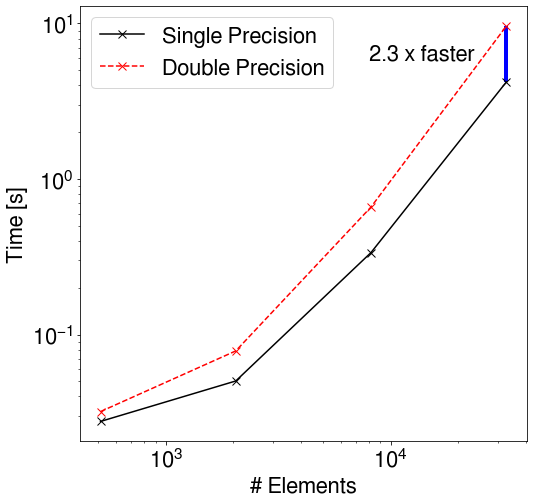

In [19]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.size'] = 22
rcParams['font.sans-serif'] = ['FreeSans']
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
print(font)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

results = results_pocl

basis_type = "P0"

arrow_length = results[(basis_type, "double")][-1] - results[(basis_type, "single")][-1]
speedup = "{0:1.1f} x faster".format(results[(basis_type, "double")][-1] / results[(basis_type, "single")][-1])

plt.loglog(results["nelements"], results[(basis_type, "single")], 'k-x', markersize=8)
plt.loglog(results["nelements"], results[(basis_type, "double")], 'r--x', markersize=8)
plt.legend(["Single Precision", "Double Precision"])
plt.arrow(results['nelements'][-1], results[(basis_type, "single")][-1], 0, 
          arrow_length,
          linestyle='--', ec="blue", lw=4, head_length=0)
plt.annotate(speedup, xy=(8E3, results[(basis_type, "single")][-1] + .3 * arrow_length))
plt.xlabel('# Elements')
plt.ylabel('Time [s]')
plt.savefig('pocl_single_layer.pdf', bbox_inches='tight', transparent=True)

print(results["nelements"])
print(results[(basis_type, "single")])
print(results[(basis_type, "double")])

## Draw Histogram chart

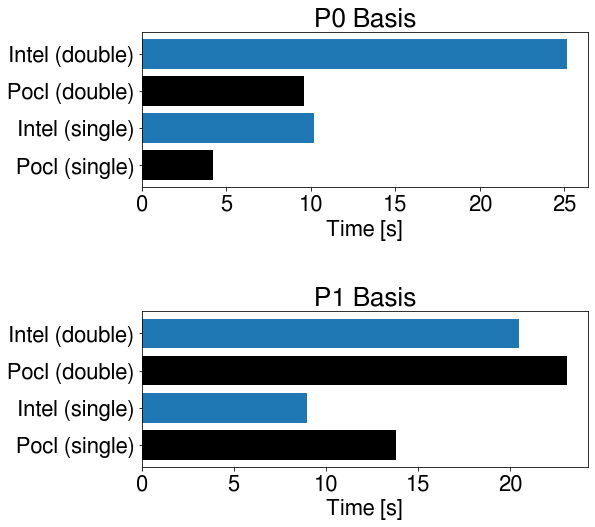

In [20]:
values_p0 = [results_pocl["P0", "single"][-1],
          results_intel["P0", "single"][-1],
          results_pocl["P0", "double"][-1],
          results_intel["P0", "double"][-1],
         ]

values_p1 = [results_pocl["P1", "single"][-1],
          results_intel["P1", "single"][-1],
          results_pocl["P1", "double"][-1],
          results_intel["P1", "double"][-1],
         ]


labels = ["Pocl (single)", "Intel (single)", "Pocl (double)", "Intel (double)"]
pos = range(4)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(211)

container = ax.barh(pos, values_p0)

container.patches[0].set_facecolor('k')
container.patches[2].set_facecolor('k')
ax.set_xlabel("Time [s]")
ax.set_yticks(pos);
ax.set_yticklabels(labels);
ax.set_title("P0 Basis")


ax = fig.add_subplot(212)
container = ax.barh(pos, values_p1)
ax.set_xlabel("Time [s]")
ax.set_yticks(pos);
ax.set_yticklabels(labels);
ax.set_title("P1 Basis")
plt.subplots_adjust(hspace=.8)

container.patches[0].set_facecolor('k')
container.patches[2].set_facecolor('k')

plt.savefig("intel_pocl_laplace_comp.pdf", bbox_inches='tight', transparent=True);

# GPU vs CPU vs Numba for Laplace single-layer

In [21]:
bempp.api.BOUNDARY_OPERATOR_DEVICE_TYPE = 'gpu'

def test_single_layer():
    """Run a single layer benchmark for a specific grid."""
    
    grid = bempp.api.shapes.regular_sphere(4)
    p0_space = bempp.api.function_space(grid, "DP", 0)
    single_time = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.laplace.single_layer(p0_space, p0_space, p0_space, precision="single").weak_form()
    double_time = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.laplace.single_layer(p0_space, p0_space, p0_space, precision="double").weak_form()
    
    return single_time, double_time

In [22]:
print("Run GPU Test")
bempp.api.BOUNDARY_OPERATOR_DEVICE_TYPE = "gpu"
res_gpu_single, res_gpu_double = test_single_layer()

print("Run Pocl Tst")
bempp.api.BOUNDARY_OPERATOR_DEVICE_TYPE = "cpu"
bempp.core.opencl_kernels.set_default_cpu_device_by_name('Portable Computing Language')
res_cpu_single, res_cpu_double = test_single_layer()

print("Run Numba Test")
bempp.api.BOUNDARY_OPERATOR_DEVICE_TYPE = "cpu"
bempp.api.DEFAULT_DEVICE_INTERFACE = "numba"
res_numba_single, res_numba_double = test_single_layer()
bempp.api.DEFAULT_DEVICE_INTERFACE = "opencl"

Run GPU Test


/home/betcke/miniconda3/envs/dev/lib/python3.9/site-packages/pyopencl/__init__.py:266: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


137 ms ± 27.2 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
3.06 s ± 209 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
Run Pocl Tst
57.1 ms ± 5.54 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
78.7 ms ± 1.3 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
Run Numba Test
257 ms ± 13.1 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
241 ms ± 124 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)


## Comparison of POCL and Intel for complex Helmholtz kernel

In [23]:
# def run_single_layer_helmholtz_benchmark():
#     """Benchmark the single layer operator."""
#     grid_sizes = [3, 4, 5, 6]
#     nelements = []
#     results = {}
#     results[("P0", "single")] = []
#     results[("P0", "double")] = []
#     results[("P1", "single")] = []
#     results[("P1", "double")] = []
#     results["nelements"] = []
    
#     print(f"Default Device: {default_device().name}")


#     for grid_size in grid_sizes:
#         grid = bempp.api.shapes.regular_sphere(grid_size)
#         p0_space = bempp.api.function_space(grid, "DP", 0)
#         p1_space = bempp.api.function_space(grid, "P", 1)
#         result_p0_single = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.helmholtz.single_layer(p0_space, p0_space, p0_space, 1.0, precision="single").weak_form()
#         result_p0_double = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.helmholtz.single_layer(p0_space, p0_space, p0_space, 1.0, precision="double").weak_form()
#         result_p1_single = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.helmholtz.single_layer(p1_space, p1_space, p1_space, 1.0, precision="single").weak_form()
#         result_p1_double = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.helmholtz.single_layer(p1_space, p1_space, p1_space, 1.0, precision="double").weak_form()
#         results[("P0", "single")].append(result_p0_single.best)
#         results[("P0", "double")].append(result_p0_double.best)
#         results[("P1", "single")].append(result_p1_single.best)
#         results[("P1", "double")].append(result_p1_double.best)
#         results["nelements"].append(grid.number_of_elements)
        
#     return results

In [24]:
# bempp.core.opencl_kernels.set_default_cpu_device_by_name('Portable Computing Language')
# results_helmholtz_pocl = run_single_layer_benchmark()

# bempp.core.opencl_kernels.set_default_cpu_device_by_name('Intel(R) OpenCL')
# results_helmholtz_intel = run_single_layer_benchmark()

In [25]:
# values_p0 = [results_helmholtz_pocl["P0", "single"][-1],
#           results_helmholtz_intel["P0", "single"][-1],
#           results_helmholtz_pocl["P0", "double"][-1],
#           results_helmholtz_intel["P0", "double"][-1],
#          ]


# labels = ["Pocl (single)", "Intel (single)", "Pocl (double)", "Intel (double)"]
# pos = range(4)

# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111)

# ax.barh(pos, values_p0)
# ax.set_xlabel("Time [s]")
# ax.set_yticks(pos);
# ax.set_yticklabels(labels);
# ax.set_title("P0 Basis")


In [26]:
# results_helmholtz_pocl["P0", "double"]

In [27]:
# results_helmholtz_intel["P0", "single"]

## Performance of domain potentials

We benchmark the electric field domain potential operator defined over the unit sphere to evaluate the potential at a number of points outside the unit sphere.

In [28]:
npoints = 50000

rand = np.random.RandomState(0)

# Points are shifted away from the unit sphere
points = rand.rand(3, npoints) + 1.5

grid = bempp.api.shapes.regular_sphere(6)
space = bempp.api.function_space(grid, "RWG", 0)


def test_potential():
    """Test the potential operator."""

    fun = bempp.api.GridFunction.from_random(space)
    
    op = bempp.api.operators.potential.maxwell.electric_field(space, points, 1.0, precision='single')    
    result_single = %timeit -o -r 2 -n 2 op @ fun
    
    op = bempp.api.operators.potential.maxwell.electric_field(space, points, 1.0, precision='double')        
    result_double = %timeit -o -r 2 -n 2 op @ fun
    
    
    return result_single.best, result_double.best

In [29]:
print("Benchmark potential on CPU with Pocl")

set_default_cpu_device_by_name("Portable Computing Language")

bempp.api.POTENTIAL_OPERATOR_DEVICE_TYPE = 'cpu'
result_potential_pocl_single, result_potential_pocl_double = test_potential()

print("Benchmark potential on Nvidia GPU")
bempp.api.POTENTIAL_OPERATOR_DEVICE_TYPE = 'gpu'
result_potential_nvidia_single, result_potential_nvidia_double = test_potential()

Benchmark potential on CPU with Pocl
23.9 s ± 276 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
55.3 s ± 191 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
Benchmark potential on Nvidia GPU
1.43 s ± 17.9 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
30.5 s ± 33.2 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


range(0, 4)
[23.609370286000058, 1.415747409000005, 55.096339988999944, 30.435061263999955]


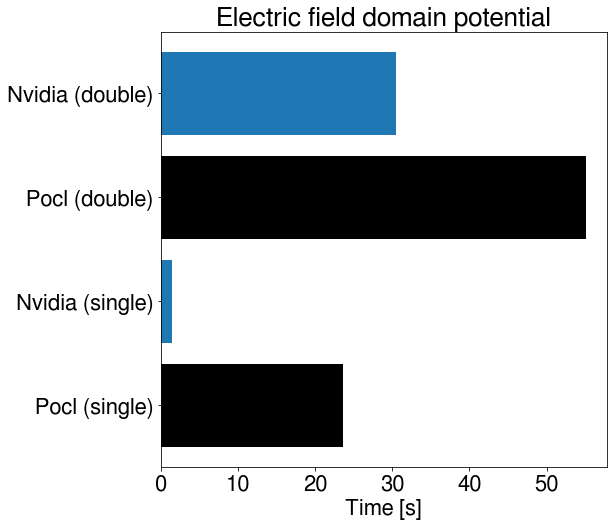

In [30]:
potential_times = [result_potential_pocl_single,
                   result_potential_nvidia_single,
                   result_potential_pocl_double,
                   result_potential_nvidia_double]

labels = ["Pocl (single)", "Nvidia (single)", "Pocl (double)", "Nvidia (double)"]
pos = range(4)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

print(pos)
print(potential_times)

container = ax.barh(pos, potential_times)

container.patches[0].set_facecolor('k')
container.patches[2].set_facecolor('k')
ax.set_xlabel("Time [s]")
ax.set_yticks(pos);
ax.set_yticklabels(labels);
ax.set_title("Electric field domain potential");

plt.savefig("efield_domain_potential.pdf", bbox_inches='tight', transparent=True)